# Using wavelet transform for time-frequency analysis

In [6]:
import analyz # install it with "pip install git+https://github.com/yzerlaut/analyz"
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

## The Morlet Wavelet

https://en.wikipedia.org/wiki/Morlet_wavelet


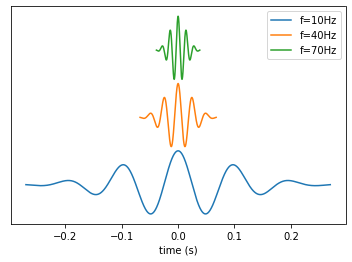

In [14]:
# Morlet wavelet:

from analyz.freq_analysis.wavelet_transform import get_Morlet_of_right_size

dt, tstop = 1e-4, 1.
t = np.arange(int(tstop/dt))*dt
for i, f in enumerate([10., 40., 70.]):
    t, wavelet = get_Morlet_of_right_size(f, dt, with_t=True)
    plt.plot(t, wavelet+2*i, label="f=%.0fHz"%f)
plt.xlabel('time (s)')
plt.yticks([])
plt.legend()

## Continuous Wavelet transform 

Here using the above morlet wavelet

In [22]:
from analyz.freq_analysis.wavelet_transform import my_cwt # custom-made wavelet transform


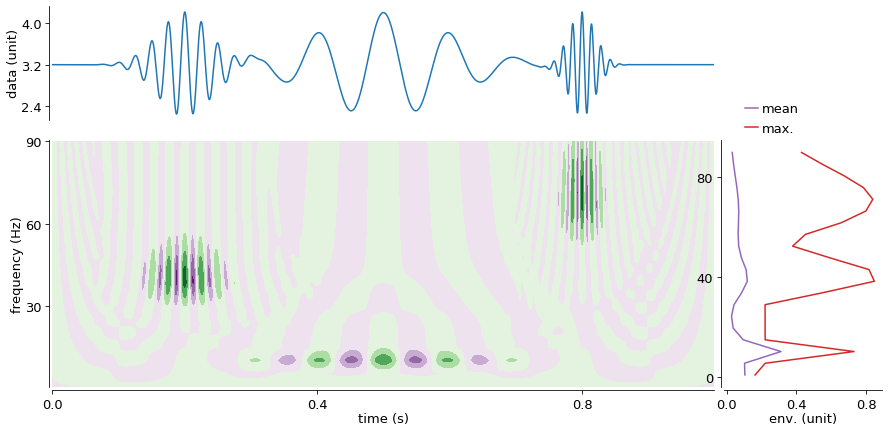

In [29]:
noise_level = 0. # NO NOISE to start
nfreq=20

# temporal sampling
dt, tstop = 1e-4, 1.
t = np.arange(int(tstop/dt))*dt
    
# ### artificially generated signal, transient oscillations
freq1, width1, freq2, width2, freq3, width3 = 10., 100e-3, 40., 40e-3, 70., 20e-3

data  = 3.2+np.cos(2*np.pi*freq1*t)*np.exp(-(t-.5)**2/2./width1**2)+\
                np.cos(2*np.pi*freq2*t)*np.exp(-(t-.2)**2/2./width2**2)+\
                np.cos(2*np.pi*freq3*t)*np.exp(-(t-.8)**2/2./width3**2)

# ### adding colored noise to test robustness
data += noise_level*np.convolve(np.exp(-np.arange(1000)*dt/400e-3),\
                            np.random.randn(len(t)), mode='same') # a slow one
data += noise_level*np.convolve(np.exp(-np.arange(1000)*dt/5e-3),\
                            np.random.randn(len(t)), mode='same') # a faster one

# Continuous Wavelet Transform analysis
freqs = np.linspace(1, 90, nfreq)
coefs = my_cwt(data, freqs, dt)

from datavyz import gen as ge
ge.time_freq_plot(t, freqs, data, coefs);

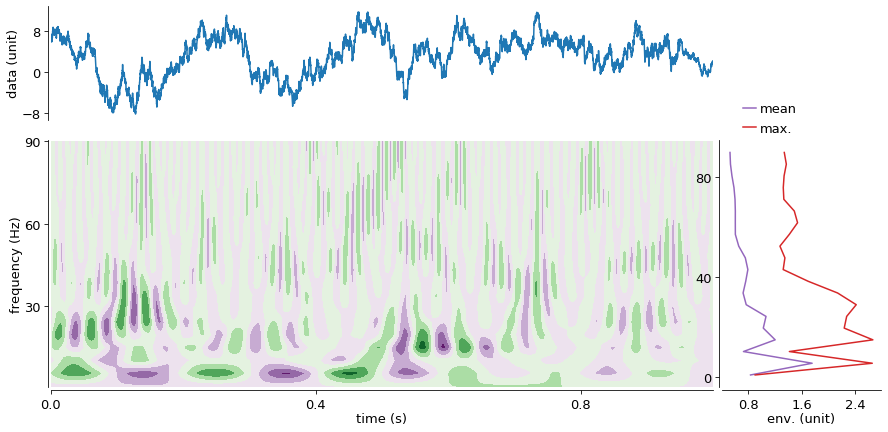

In [30]:
noise_level = 0.2 # NO NOISE to start
nfreq=20

# temporal sampling
dt, tstop = 1e-4, 1.
t = np.arange(int(tstop/dt))*dt
    
# ### artificially generated signal, transient oscillations
freq1, width1, freq2, width2, freq3, width3 = 10., 100e-3, 40., 40e-3, 70., 20e-3

data  = 3.2+np.cos(2*np.pi*freq1*t)*np.exp(-(t-.5)**2/2./width1**2)+\
                np.cos(2*np.pi*freq2*t)*np.exp(-(t-.2)**2/2./width2**2)+\
                np.cos(2*np.pi*freq3*t)*np.exp(-(t-.8)**2/2./width3**2)

# ### adding colored noise to test robustness
data += noise_level*np.convolve(np.exp(-np.arange(1000)*dt/400e-3),\
                            np.random.randn(len(t)), mode='same') # a slow one
data += noise_level*np.convolve(np.exp(-np.arange(1000)*dt/5e-3),\
                            np.random.randn(len(t)), mode='same') # a faster one

# Continuous Wavelet Transform analysis
freqs = np.linspace(1, 90, nfreq)
coefs = my_cwt(data, freqs, dt)

from datavyz import gen as ge
ge.time_freq_plot(t, freqs, data, coefs);